In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv('usedCarListing.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9655, 19)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,mpg_city,mpg_hwy,engine,transmission,drive_type,fuel_type,popular_feature,vehicle_history,cpo
0,2017,Ford,['Fusion'],SE FWD,Stanton,CA,"56,448","['$10,899']",Magnetic,Gray,21,32,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']","['0', ' reported accidents', 'Fleet or Mixed U...",False
1,2017,BMW,"['3', 'Series']",330i xDrive Sedan,Freeport,NY,"31,028","['$15,928']",Alpine White,Venetian Beige/Black,23,33,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],"['0', ' reported accidents', 'Personal or Rent...",False
2,2019,Dodge,"['Grand', 'Caravan']",SXT,San Francisco,CA,"20,386","['$18,697']",Black Onyx Crystal Pearlcoat,Black/Light Graystone,17,25,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...","['0', ' reported accidents', 'Personal or Rent...",False
3,2017,Ford,['Fusion'],SE FWD,Denver,NC,"99,515","['$8,799']",Shadow Black,Black,21,32,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']","['1', ' reported accidents', 'Fleet or Mixed U...",False
4,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Boulder,CO,"43,503","['$26,800']",Oxford White,Dark Earth Gray,16,22,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],"['0', ' reported accidents', 'Personal or Rent...",False


1. Create new features

In [5]:

# split vehicle history into four variables(num_accident, usage_type, title, num_owner)
split_data = df["vehicle_history"].str.split(",")
data = split_data.to_list()
names = ["1", "2", "3", "4", '5', '6']
new_df = pd.DataFrame(data, columns=names)
df['num_accident'] = new_df['1'].apply(lambda x:x[2:-1])
df['usage_type'] = new_df['3'].apply(lambda x:x[2:-1]) 
df['title'] = new_df['4'].apply(lambda x:x[2:-1])
df['num_owner'] = new_df['5'].apply(lambda x:x[2:-2])
# delete the history column
del df['vehicle_history']
df.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,['Fusion'],SE FWD,Stanton,CA,"56,448","['$10,899']",Magnetic,Gray,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Fleet or Mixed Use,Clean,1
1,2017,BMW,"['3', 'Series']",330i xDrive Sedan,Freeport,NY,"31,028","['$15,928']",Alpine White,Venetian Beige/Black,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,1
2,2019,Dodge,"['Grand', 'Caravan']",SXT,San Francisco,CA,"20,386","['$18,697']",Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,1
3,2017,Ford,['Fusion'],SE FWD,Denver,NC,"99,515","['$8,799']",Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Boulder,CO,"43,503","['$26,800']",Oxford White,Dark Earth Gray,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,1


Check the unique values of four newly constructed features

In [6]:

df.num_owner.unique(),df.num_accident.unique(),df.title.unique(),df.usage_type.unique()

(array(['1', '2', '5', '3', '0', '4', '6', '8', '7', 'alvage', '13', '9'],
       dtype=object),
 array(['0', '1', '2', '3', '4', '5'], dtype=object),
 array(['Clean', 'Salvaged', 'Frame Damaged', 'Theft Recovered',
        'Frame Damage', 'Theft Recovere'], dtype=object),
 array(['Fleet or Mixed Use', 'Personal or Rental Use'], dtype=object))

We found that there are some wrong values or synonyms('Frame Damaged', 'Frame Damage') in num_owner, title features due to scraping or parsing. The next block is to deal with these wrong data.

In [8]:
### Deal with title (combine theft recovered with theft recovere, combine frame damaged with frame damage)
df["title"]= df["title"].replace('Theft Recovere', "Theft Recovered") 
df["title"]= df["title"].replace('Frame Damage', "Frame Damaged") 
print(df.title.unique())

### Deal with num_owner that are strings
df["num_owner"]= df["num_owner"].replace('alvage', np.nan) 
df["num_owner"]= df["num_owner"].replace('rame Damage', np.nan) 
print(df.num_owner.unique())

['Clean' 'Salvaged' 'Frame Damaged' 'Theft Recovered']
['1' '2' '5' '3' '0' '4' '6' '8' '7' nan '13' '9']


2. Check for missing values

In [10]:
df.isna().sum()

year               0
make               0
model              0
sub_model          0
city               0
state              0
mileage            0
price              0
exterior_color     0
interior_color     0
mpg_city           0
mpg_hwy            0
engine             0
transmission       0
drive_type         0
fuel_type          0
popular_feature    0
cpo                0
num_accident       0
usage_type         0
title              0
num_owner          3
dtype: int64

In [11]:
# num_owern, numeric missing value, take the median to fillna
df['num_owner'].fillna(df['num_owner'].median(), inplace=True)

In [12]:
## look at mpg features
print(df.mpg_city.unique())
print(df.mpg_hwy.unique())

['21' '23' '17' '16' '25' '22' '24' '31' '18' '26' '28' 'N' '15' '19' '20'
 '14' '30' '27' '29' '126' '13' '43' '12' '44' '101' '10' '121' '41' '104'
 '66' '120' '32' '11' '48' '34' '95' '106' '118' '110' '51' '40' '33' '38'
 '129' '35' '42' '53' '137' '122' '39' '54' '60' '128' '36' '49' '9' '124'
 '85' '37' '8']
['32' '33' '25' '22' '28' '23' '30' '40' '31' '36' '38' 'cty' '29' '24'
 '34' '21' '26' '37' '19' '39' '99' '18' '41' '17' '27' '44' '93' '35'
 '15' '103' '91' '66' '92' '42' '45' '81' '96' '20' '48' '105' '47' '43'
 '102' '16' '46' '111' '49' '50' '51' '53' '109' '14' '90' '101' '82' '94'
 '13' '108' '12']



Found that there are 'N' and 'cty' values in the mpg features, which are wrong data that we need to replace with NA

In [13]:
## convert 'N' and 'cty' to nan.
df["mpg_city"]= df["mpg_city"].replace('N', np.nan) 
df["mpg_hwy"]= df["mpg_hwy"].replace('cty', np.nan)

In [14]:
# deal with mpg_city, mpg_hwy
# first convert mpg from string to numeric values
df['mpg_city'] = df['mpg_city'].astype(float)
df['mpg_hwy'] = df['mpg_hwy'].astype(float)

Fill missing values in mpg based on domain knowledge.


Since mpg is strongly correlated with vehicle fuel_type, especially for alternative fuel vehicles (hybrid, electric, CNG, hydrogen), I will use the group mean to fillna for these types of vehicles.

For gasoline and diesel vehicles, by observation, I found the missing mpg values for these types of vehicles are more like gas-gazzlers. Therefore, I decided to use 5% quantiles to fill these missing values to indicate their extreme low mpgs.

In [15]:

# checking the fuel types that contains missing values
df[df['mpg_city'].isna()]['fuel_type'].unique()

array(['Gas', 'Hydrogen', 'Diesel', 'Plug-In', 'CNG', 'Hybrid'],
      dtype=object)

In [16]:

# checking gasoline and diesel vehicles whose mpg are missing
display(df[(df['fuel_type']=='Gas') & (df['mpg_city'].isna())].head())
display(df[(df['fuel_type']=='Diesel') & (df['mpg_city'].isna())].head())

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
26,2004,HUMMER,['H2'],SUV,McCook,IL,"149,795","['$9,950']",White,Wheat,...,6.0L V-8 Gas,Automatic,4WD,Gas,[],False,2,Personal or Rental Use,Clean,1
35,2017,Ford,"['Super', 'Duty', 'F-250']",XL Crew Cab 8' Bed 4WD,Lexington,NC,"94,903","['$29,987']",White,Medium Earth Gray,...,6.2L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,1
170,2012,Ford,"['Econoline', 'Commercial', 'Cutaway']","E-450 158"" DRW",Caledonia,MI,"213,351","['$7,997']",Blue,White,...,6.8L V-10 Gas,Automatic,RWD,Gas,[],False,2,Personal or Rental Use,Clean,1
196,2017,Ford,"['Super', 'Duty', 'F-250']",XLT Crew Cab 6.75' Bed 4WD,Huntersville,NC,"62,669","['$34,787']",Shadow Black,Medium Earth Gray,...,6.2L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,1
214,2016,Ram,"['3500', 'Chassis', 'Cab']","4WD Crew Cab 172"" WB 60"" CA Tradesman",Southampton,NJ,"18,486","['$35,995']",Bright White Clearcoat,Diesel Gray/Black,...,6.4L V-8 Gas,Automatic,4WD,Gas,['Cruise Control'],False,1,Personal or Rental Use,Clean,1


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
194,2017,Ford,"['Super', 'Duty', 'F-250']",Lariat Crew Cab 8' Bed 4WD,Columbus,OH,"18,095","['$34,999']",White,Unspecified,...,6.7L V-8 Diesel Turbocharged,Automatic,4WD,Diesel,[],False,1,Fleet or Mixed Use,Frame Damaged,2
301,2019,Mercedes-Benz,"['Sprinter', 'Cab', 'Chassis']","3500XD 170""",Houston,TX,10,"['$33,995']",White,Gray,...,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Diesel,[],False,0,Personal or Rental Use,Clean,1
308,2017,Ford,"['Super', 'Duty', 'F-350']",Platinum Crew Cab 8' Bed 4WD SRW,Hillsboro,OR,"38,755","['$42,995']",White,Unspecified,...,6.7L V-8 Diesel Turbocharged,Automatic,4WD,Diesel,[],False,0,Personal or Rental Use,Clean,1
369,2001,Dodge,"['Ram', '3500']",Base Quad Cab Long Bed 4WD DRW,Butler,PA,"132,606","['$11,090']",Black,Mist Gray,...,5.9L V-6 Diesel Turbocharged,Automatic,4WD,Diesel,[],False,0,Personal or Rental Use,Clean,4
376,2019,Mercedes-Benz,"['Sprinter', 'Cab', 'Chassis']","3500XD 170""",Houston,TX,49,"['$33,995']",White,Gray,...,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Diesel,[],False,0,Personal or Rental Use,Clean,1


Diesel and gasoline cars whose mpgs are missing are either large cars or luxury cars, whose mpg will be at the very low level.

Fillna for mpg features

In [17]:
# use fuel_type (electric, plug-in, hybrid, hydrogen, CNG) to fillna first. 
# deal with mpg_city first.
for i in range(len(df)):
    if (df['fuel_type'][i] == 'Hydrogen' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]= df[df['fuel_type']=='Hydrogen']['mpg_city'].mean()
    elif (df['fuel_type'][i] == 'Plug-In' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]=df[df['fuel_type']=='Plug-In']['mpg_city'].mean()
    elif (df['fuel_type'][i] == 'Hybrid' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]=df[df['fuel_type']=='Hybrid']['mpg_city'].mean()
    elif (df['fuel_type'][i] == 'CNG' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]=df[df['fuel_type']=='CNG']['mpg_city'].mean()
    # The missing values for Diesel and Gas vehicles are more like gas-gazzlers. So I can't use mean or median
    # to replace the missing values. 
    # I decided to use the 95% quantile values to fillna
    elif (df['fuel_type'][i] == 'Gas' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]=df[df['fuel_type']=='Gas']['mpg_city'].quantile(q=0.05)
    elif (df['fuel_type'][i] == 'Diesel' and np.isnan(df['mpg_city'][i])):
        df['mpg_city'][i]=df[df['fuel_type']=='Diesel']['mpg_city'].quantile(q=0.05)
    
# then deal with mpg_hwy.      
for i in range(len(df)):
    if (df['fuel_type'][i] == 'Hydrogen' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='Hydrogen']['mpg_hwy'].mean()
    elif (df['fuel_type'][i] == 'Plug-In' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='Plug-In']['mpg_hwy'].mean()
    elif (df['fuel_type'][i] == 'Hybrid' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='Hybrid']['mpg_hwy'].mean()        
    elif (df['fuel_type'][i] == 'CNG' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='CNG']['mpg_hwy'].mean()
    # For diesel vehicles with missing values, I found all diesel vehicles are missing the mpg_hwy. 
    elif (df['fuel_type'][i] == 'Gas' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='Gas']['mpg_hwy'].quantile(q=0.05)
    elif (df['fuel_type'][i] == 'Diesel' and np.isnan(df['mpg_hwy'][i])):
        df['mpg_hwy'][i]=df[df['fuel_type']=='Diesel']['mpg_hwy'].quantile(q=0.05)       
        

In [18]:
df.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,['Fusion'],SE FWD,Stanton,CA,"56,448","['$10,899']",Magnetic,Gray,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Fleet or Mixed Use,Clean,1
1,2017,BMW,"['3', 'Series']",330i xDrive Sedan,Freeport,NY,"31,028","['$15,928']",Alpine White,Venetian Beige/Black,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,1
2,2019,Dodge,"['Grand', 'Caravan']",SXT,San Francisco,CA,"20,386","['$18,697']",Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,1
3,2017,Ford,['Fusion'],SE FWD,Denver,NC,"99,515","['$8,799']",Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Boulder,CO,"43,503","['$26,800']",Oxford White,Dark Earth Gray,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,1


In [19]:

## no more NA for now
df.isna().sum()

year               0
make               0
model              0
sub_model          0
city               0
state              0
mileage            0
price              0
exterior_color     0
interior_color     0
mpg_city           0
mpg_hwy            0
engine             0
transmission       0
drive_type         0
fuel_type          0
popular_feature    0
cpo                0
num_accident       0
usage_type         0
title              0
num_owner          0
dtype: int64

3. Convert some categorical variables into numeric


Numeric variable: mileage, price, mpg_city, mpg_hwy, num_accident, num_owner

deal with mileage 

In [20]:
df['mileage'] = df['mileage'].apply(lambda x: ''.join(x.split(',')))
df['mileage'] = df['mileage'].astype(int)
df['mileage'].head()

0    56448
1    31028
2    20386
3    99515
4    43503
Name: mileage, dtype: int32

deal with price

In [21]:
# deal with price
df['price'] = df['price'].apply(lambda x: ''.join(x[3:-2].split(',')))
for i in range(len(df)):
    if len(df['price'][i])==0:
        empty_index = i 
    else:
        df['price'][i]= int(df['price'][i])
df['price'].head()

0    10899
1    15928
2    18697
3     8799
4    26800
Name: price, dtype: object

In [22]:

# drop the rows with missing price information
print(empty_index)
df = df.drop(df.index[empty_index])
print(df.shape)

2332
(9654, 22)


In [23]:
#deal with num_accident and num_owner

In [24]:
df['num_accident'] = df['num_accident'].astype(int)
df['num_owner'] = df['num_owner'].astype(int)

In [25]:
# checking feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 9654
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             9654 non-null   int64  
 1   make             9654 non-null   object 
 2   model            9654 non-null   object 
 3   sub_model        9654 non-null   object 
 4   city             9654 non-null   object 
 5   state            9654 non-null   object 
 6   mileage          9654 non-null   int32  
 7   price            9654 non-null   object 
 8   exterior_color   9654 non-null   object 
 9   interior_color   9654 non-null   object 
 10  mpg_city         9654 non-null   float64
 11  mpg_hwy          9654 non-null   float64
 12  engine           9654 non-null   object 
 13  transmission     9654 non-null   object 
 14  drive_type       9654 non-null   object 
 15  fuel_type        9654 non-null   object 
 16  popular_feature  9654 non-null   object 
 17  cpo           

4. Drop duplicate rows

In [26]:
# There are totally 5 duplcated rows
print(df.duplicated().sum())
# drop duplicated rows and keep the first row.
print(df.shape)
df = df.drop_duplicates(keep='first')
print(df.shape)

3
(9654, 22)
(9651, 22)


5. Deal with potential outliers/wrong data (mileage, price)

In [27]:

# Check very low mileage and very high mileage
display(df.sort_values(by='mileage',ascending=False).head())
df.sort_values(by='mileage',ascending=True).head()
## The data seems making sense to me. I won't drop any data from mileage here.

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
3091,2012,Ram,['3500'],SLT Crew Cab 8' Box 2WD,Charlotte,NC,484773,14995,Bright White,Dark Slate/Medium Graystone Interior,...,6.7L Inline-6 Diesel Turbocharged,Automatic,RWD,Diesel,"['Remote Engine Start', 'Cruise Control']",False,1,Fleet or Mixed Use,Clean,2
6988,2012,Volkswagen,['Jetta'],TDI SportWagen DSG,Kingsport,TN,445612,4900,Silver,Titan Black,...,2.0L Inline-4 Diesel Turbocharged,Automatic,FWD,Diesel,[],False,1,Personal or Rental Use,Clean,1
7744,2006,Toyota,['Tundra'],SR5 Double Cab V8 RWD Automatic,San Antonio,TX,381822,4499,Salsa Red Pearl,Taupe,...,4.7L V-8 Gas,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,2
8430,2001,Chevrolet,"['Silverado', '1500']",LT Extended Cab Standard Box 2WD,Pensacola,FL,366778,3985,Silver,Unknown,...,5.3L V-8 Gas,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,2
1725,2012,Ford,"['Super', 'Duty', 'F-450']","Lariat Crew Cab 172"" DRW 4WD",Phoenix,AZ,366633,15888,White,Unknown,...,6.7L V-8 Diesel Turbocharged,Automatic,4WD,Diesel,[],False,0,Fleet or Mixed Use,Clean,1


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
4438,2019,Dodge,"['Grand', 'Caravan']",SXT,Roanoke,IL,6,21923,White Knuckle Clearcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,0
8562,2019,Mercedes-Benz,['A-Class'],A 220 4MATIC,Lincolnwood,IL,7,33875,Night Black,Black,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],True,0,Personal or Rental Use,Clean,0
2043,2019,Mercedes-Benz,"['Sprinter', 'Cab', 'Chassis']","4500 170""",Monroe,NC,8,28998,White,Unknown,...,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Diesel,[],False,0,Personal or Rental Use,Clean,0
5304,2020,Mercedes-Benz,['C-Class'],C 300 Sedan 4MATIC,Lake Bluff,IL,9,39990,Black,Silk Beige,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,0
301,2019,Mercedes-Benz,"['Sprinter', 'Cab', 'Chassis']","3500XD 170""",Houston,TX,10,33995,White,Gray,...,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Diesel,[],False,0,Personal or Rental Use,Clean,1


By checking the 10 cars with top 5 highest mileage and 5 lowest mileage, I need to check if they are making sense.

For top 5 mileage, the total mileage for 8 years is about 484k and average annua mileage is about 60k, which totally makes sense to me.

For bottom 5 mileage, the mileage is from 6~10, which is a very low number. By checking the model year, num_owner and usage_type, I guess these vehicles are purchased by car rental companies and haven't been driven ever, but due to some known reasons, these cars are listed as used cars online for resell purpose. These data makes sense to me.

Therefore, I keep all the data records at this step.

In [28]:
# Check very low price and very high price
display(df.sort_values(by='price',ascending=False).head(10))
df.sort_values(by='price',ascending=True).head(10)
## The high and low prices seems making sense to me. Luxury used cars have very high price. 
## Old used cars have very low prices
## I won't drop any data from mileage here.

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
7204,2015,Rolls-Royce,['Wraith'],RWD,Tempe,AZ,23390,149888,Black,Black,...,6.6L V-12 Gas Turbocharged,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,1
7736,2005,Lamborghini,['Murcielago'],Coupe,Boerne,TX,4565,148888,Grey Metallic,Red,...,6.2L V-12 Gas,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,2
5159,2014,Ferrari,['FF'],Hatchback,Greensboro,NC,15237,144635,Nero,Nero,...,6.3L V-12 Gas,Automatic,AWD,Gas,[],True,0,Fleet or Mixed Use,Clean,3
1690,2010,Ferrari,"['599', 'GTB', 'Fiorano']",Coupe,Ontario,CA,30061,139500,Nero Daytona Metallic,Nero,...,6.0L V-12 Gas,Manual,RWD,Gas,[],False,0,Personal or Rental Use,Clean,5
650,2008,Ferrari,"['599', 'GTB', 'Fiorano']",Coupe,Boerne,TX,18075,129888,Corsa Red,Interior Color,...,6.0L V-12 Gas,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,5
696,2015,Ferrari,['California'],Convertible,Melbourne,FL,5835,128998,Nero Daytona Metallic,Sabbia,...,3.9L V-8 Gas Turbocharged,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,2
7698,2008,Ferrari,"['599', 'GTB', 'Fiorano']",Coupe,Marietta,GA,16148,124900,Silverstone Gray,Interior Color,...,6.0L V-12 Gas,Manual,RWD,Gas,[],False,0,Personal or Rental Use,Clean,4
2501,2012,Ferrari,['FF'],Hatchback,Pittsburgh,PA,25400,118075,Gray,Tan,...,6.3L V-12 Gas,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,4
5563,2007,Ferrari,"['599', 'GTB', 'Fiorano']",Coupe,Mesa,AZ,18687,114999,Daytona Black,Black,...,6.0L V-12 Gas,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,5
4036,2008,Bentley,['Azure'],Convertible,Naples,FL,10393,109995,Beluga Black,Standard Interior,...,6.8L V-8 Gas Turbocharged,Automatic,RWD,Gas,[],False,0,Personal or Rental Use,Clean,2


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
253,2005,Dodge,['Caravan'],Grand SXT LWB,Chicago,IL,183245,1500,Stone White,Unknown,...,3.8L V-6 Gas,Automatic,FWD,Gas,['Cruise Control'],False,1,Fleet or Mixed Use,Clean,4
710,1999,Suzuki,"['Grand', 'Vitara']",4dr JLX Auto 4WD,Manchester,MD,180410,1500,Black,Gray,...,2.5L V-6 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,4
8790,2001,Ford,['Escape'],XLT FWD,Plainfield,IN,254999,1538,Toreador Red Metallic,Medium Graphite,...,3.0L V-6 Gas,Automatic,FWD,Gas,['Cruise Control'],False,3,Personal or Rental Use,Clean,8
6055,2000,Ford,['Escort'],ZX2 Coupe,Everett,WA,287225,1590,Silver Frost Metallic,Dark Charcoal,...,2.0L Inline-4 Gas,Manual,FWD,Gas,[],False,0,Personal or Rental Use,Clean,3
6784,2002,Honda,['Civic'],LX Coupe Automatic,Orlando,FL,245421,1595,Taffeta White,Gray,...,1.7L Inline-4 Gas,Automatic,FWD,Gas,['Cruise Control'],False,0,Personal or Rental Use,Clean,4
3623,1998,Chevrolet,"['Monte', 'Carlo']",LS,Kent,WA,188000,1600,Torch Red,Black,...,3.1L V-6 Gas,Automatic,FWD,Gas,[],False,0,Personal or Rental Use,Clean,6
5857,2001,Honda,['Odyssey'],EX 7-Passenger,Bloomfield Hills,MI,233255,1695,Dark Emerald Pearl,Ivory,...,3.5L V-6 Gas,Automatic,FWD,Gas,['Cruise Control'],False,1,Personal or Rental Use,Clean,1
1166,2003,Buick,['Regal'],LS,Lakewood,NJ,128198,1800,Sterling Silver Metallic,Medium Gray,...,3.8L V-6 Gas,Automatic,FWD,Gas,['Cruise Control'],False,0,Personal or Rental Use,Clean,4
2667,1998,Dodge,['Caravan'],Base 3-door FWD SWB,Boaz,AL,215798,1800,Blue,Unknown,...,3.0L V-6 Gas,Automatic,FWD,Gas,[],False,0,Personal or Rental Use,Clean,3
5777,2002,Ford,['Mustang'],Standard Coupe,Happy Valley,OR,233850,1850,Black,Black,...,3.8L V-6 Gas,Manual,RWD,Gas,[],False,0,Personal or Rental Use,Clean,2


By checking the top 10 and bottom 10 used cars in term of resell price, I found the 10 most expensive cars are all luxury brands such as Rolls-Royce, Ferrari, Bentley and Lamborghini, which makes sense for the extreme high prices.

For the 10 cheapest used cars, they are old cars with very high mileage. Therefore, the low prices make sense here, too.

Therefore, I will also keep all the data from this step.

In [29]:
print(df.shape)

(9651, 22)


In [31]:
df.to_csv('usedCarListingCleaned.csv', encoding = 'utf-8')

After the feature engineering(creating new features and dropping features), dealing with missing values, checking outliers, dropping duplicated rows, there are totally 9984 records and 22 features left.

# EDA

In [33]:
df = pd.read_csv('usedCarListingCleaned.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9651, 22)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,['Fusion'],SE FWD,Stanton,CA,56448,10899,Magnetic,Gray,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Fleet or Mixed Use,Clean,1
1,2017,BMW,"['3', 'Series']",330i xDrive Sedan,Freeport,NY,31028,15928,Alpine White,Venetian Beige/Black,...,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,1
2,2019,Dodge,"['Grand', 'Caravan']",SXT,San Francisco,CA,20386,18697,Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,1
3,2017,Ford,['Fusion'],SE FWD,Denver,NC,99515,8799,Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Boulder,CO,43503,26800,Oxford White,Dark Earth Gray,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,1


0. Data overview

In [34]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

In [35]:
df.describe(include='all')

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
count,9651.000000,9651,9651,9651,9651,9651,9651.000000,9651.000000,9651,9651,...,9651,9651,9651,9651,9651,9651,9651.000000,9651,9651,9651.000000
unique,NaN,49,486,1859,1557,50,NaN,NaN,1049,569,...,179,2,4,7,191,2,NaN,2,4,NaN
top,NaN,Ford,['F-150'],SE FWD,Houston,TX,NaN,NaN,Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,[],False,NaN,Personal or Rental Use,Clean,NaN
freq,NaN,2409,680,551,166,1060,NaN,NaN,601,2087,...,950,9368,5057,8984,3759,9035,NaN,7500,9531,NaN
mean,2014.183090,NaN,NaN,NaN,NaN,NaN,74514.623355,14231.238006,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.232929,NaN,NaN,1.738473
std,4.601976,NaN,NaN,NaN,NaN,NaN,52169.502230,9199.823621,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.522685,NaN,NaN,1.122262
min,1997.000000,NaN,NaN,NaN,NaN,NaN,6.000000,1500.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,35208.000000,8104.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
50%,2016.000000,NaN,NaN,NaN,NaN,NaN,60401.000000,12978.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,104332.500000,17498.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000


# Vehicle information summary
Model years between 1997-2020
Mileage ranging 5 miles to 484,773 miles
Price ranging from 1,500 to about 214,900 dollars
There are 9984 unique listings, 53 Makes, 498 Models, 1049 unique exterior colors, 558 unique interior colors, 179 unique engines, 2 unique transmission, 4 unique drive type, 7 unique fuel type, 2 different used type (cpo or used)



# Vehicle history
2 unique usage type
5 unique titles
Number of accidents ranging from 0 to 5
Number of previous owners raning from 0(rental car, assuming no previous owners) to 13

# Vehicle geospatial info
50 states
1564 cities

# 1. Vehicle listing count analysis

# 1.1 Vehicle listings for different years

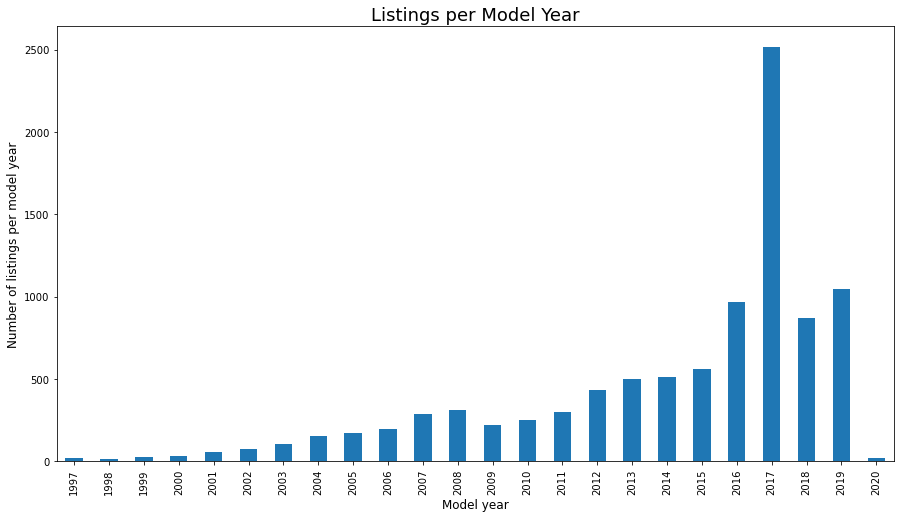

In [36]:
df.groupby(['year'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per model year', fontsize=12)
plt.xlabel('Model year', fontsize=12)
plt.title('Listings per Model Year', fontsize=18)
plt.show()

In [37]:

df[df['year']==2017]['year'].count()/df['year'].count()

0.2605947570199979

# Main findings:

3-year used cars take dominants and account for about 28% of total used car listings.

One important reason is that 3-year lease cars are very popular and after three-year lease, the car users will return the leased car to dealers and dealers will list them as used cars online.

# 1.2 Vehicle listings from different states

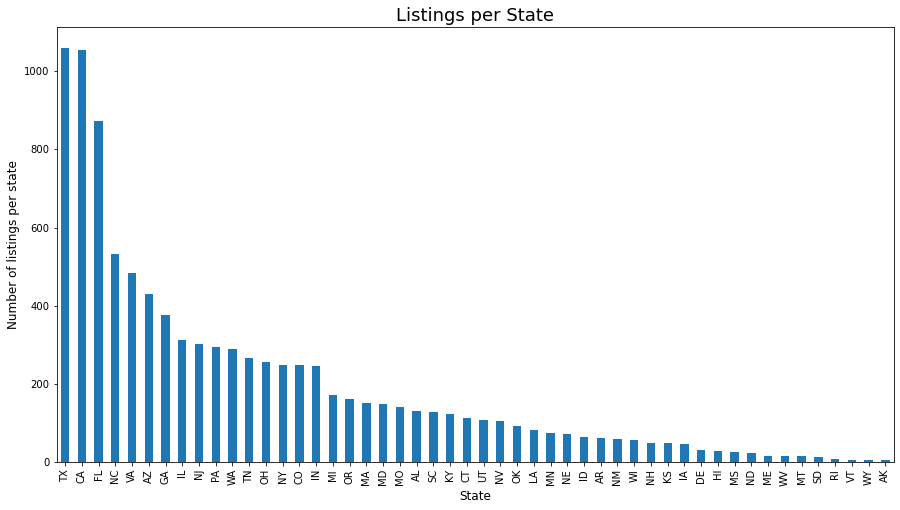

In [38]:
df.groupby(['state'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

In [39]:
len(df[(df.state=='TX') | (df.state=='CA')|(df.state=='FL')])/len(df)

0.30960522225676096

# Main findings:

Texas, California and Florida are the 3 states with the largest numbers of used car listings, and these three states account for 31% of US used car markets.

The main reason is that, from wiki,https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population, we know that the top 3 states with most population are CA, TX and FL. The car ownership is strongly positively correlated with population, so is the used car number.

Therefore, it makes sense that CA, TX and FL, the top 3 populous states, also have the largest number of used car listings.

# 1.3 Vehicle listings for different carmakers

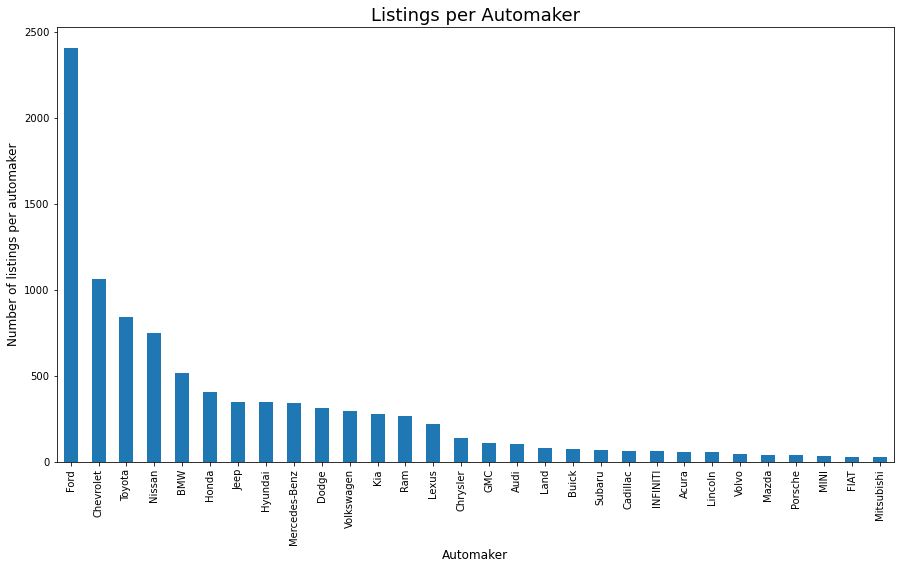

In [40]:
## Only listing the top 30 car makers for better visualization
df.groupby(['make'])['year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

In [41]:
len(df[(df.make=='Ford') | (df.make=='Chevrolet')|(df.make=='Toyota')|(df.make=='Nissan')])/len(df)

0.5250233136462543

# Main findings:

Ford is the domimant brand on the used car market. And Chevrolet, Toyota, Nissan are another top 4 makers. Totally they account for about 55% of the used car listings.

Ford and Chevrolet are two US brands that lots of consumers like to purchase (maybe because of US brand, brand loyalty, etc). Toyota and Nissan are two Japanese brands which represent for cost-benefit efficient cars and their used cars works very well after long-time use.

However, it is surprising to see that Honda only ranks 8th in the used car market.

# 1.4 Vehicle listings for different title

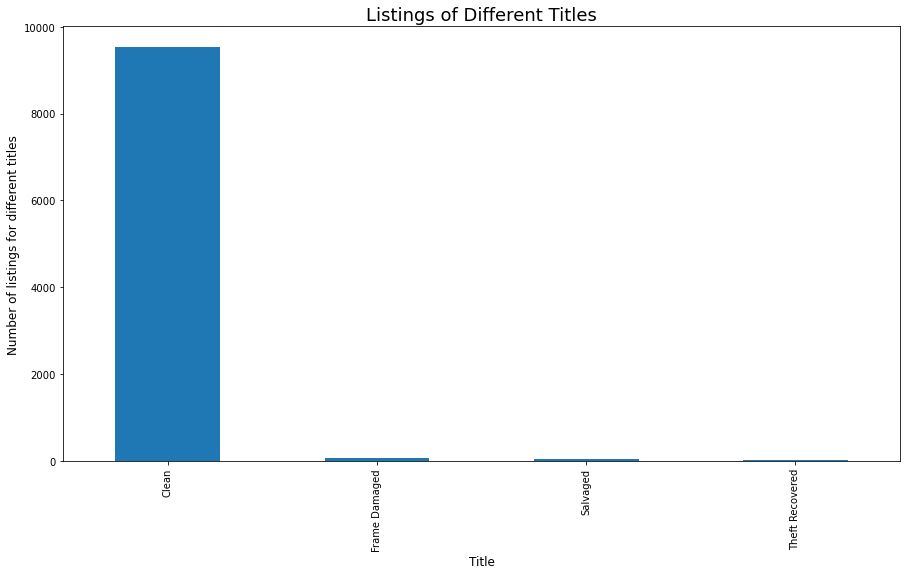

In [42]:

df.groupby(['title'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different titles', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.title('Listings of Different Titles', fontsize=18)
plt.show()

In [43]:
len(df[df.title=='Clean'])/len(df)

0.9875660553310538

98.8% of the used cars have a clean title and only about 1.2% of the vehicles have some problematic titles such as Frame Damaged, Salvaged, Theft Recovered or Lemon car.

# 1.5 Vehicle listings for different number of accidents

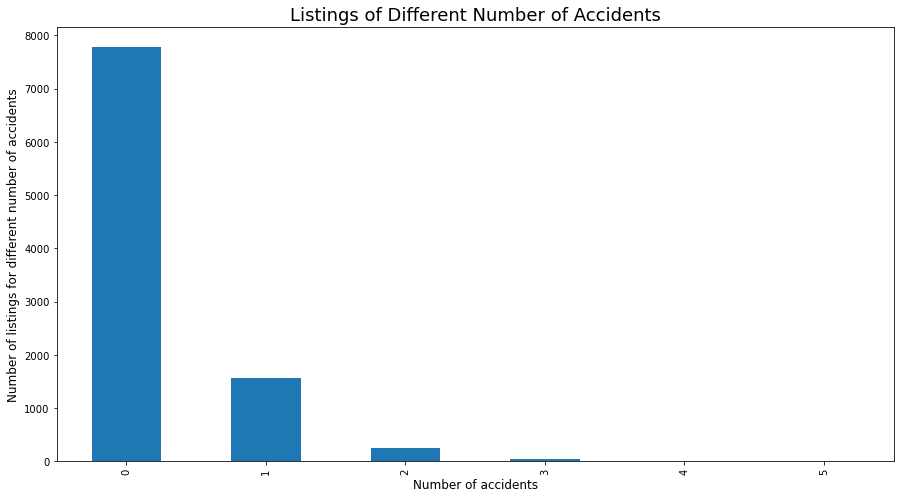

In [44]:
df.groupby(['num_accident'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

# 1.6 Vehicle listings for different number of previous owners

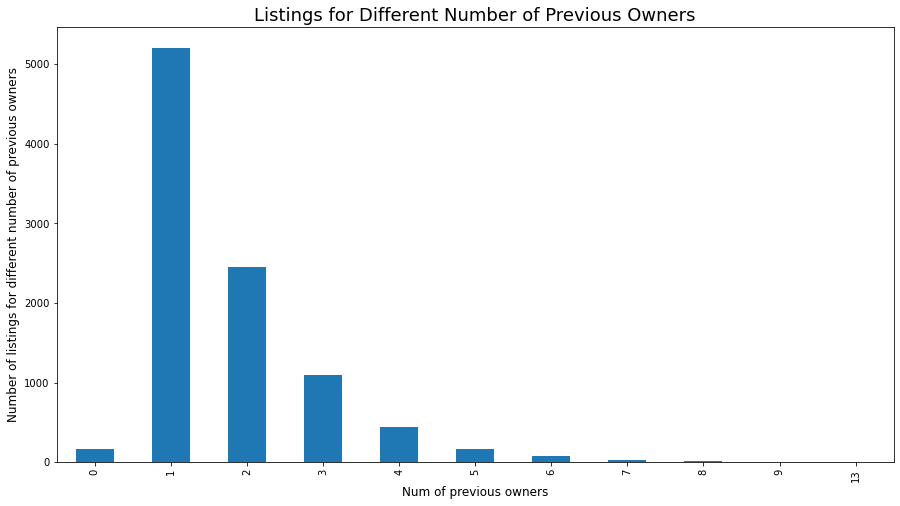

In [45]:
df.groupby(['num_owner'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of previous owners', fontsize=12)
plt.xlabel('Num of previous owners', fontsize=12)
plt.title('Listings for Different Number of Previous Owners', fontsize=18)
plt.show()

Most of the cars have 1 or 2 or 3 owners, and some cars have zero owners (means the cars are leased so there is no pre-ownener. There are a few cars have very high number of previous owners, such as 8, 9 or even 13.

In [46]:
# checking cars with over 8 pre-owners
df[(df.num_owner>7)]

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
220,2013,Nissan,['Altima'],2.5 S Coupe,Plantation,FL,110450,5001,Super Black,Charcoal,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,['Cruise Control'],False,0,Personal or Rental Use,Clean,8
1220,2004,Porsche,['Cayenne'],S AWD,Blue Springs,MO,149356,5877,Crystal Silver Metallic,Black,...,4.5L V-8 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,8
1693,2005,Bentley,"['Continental', 'GT']",W12,Sherwood,AR,44042,29000,Midnight Emerald,Loxley,...,6.0L W-12 Gas Turbocharged,Automatic,AWD,Gas,[],False,0,Personal or Rental Use,Clean,8
1832,2004,BMW,"['6', 'Series']",645Ci Coupe,Alcoa,TN,104600,9092,Jet Black,Black,...,4.4L V-8 Gas,Manual,RWD,Gas,[],False,0,Personal or Rental Use,Clean,8
2088,2006,BMW,['M5'],Sedan,Mesa,AZ,123118,10999,Indianapolis Red Metallic,Sepang Bronze,...,5.0L V-10 Gas,Manual,RWD,Gas,[],False,1,Fleet or Mixed Use,Clean,13
2375,2004,Chrysler,['Crossfire'],Coupe,Carrollton,GA,186030,3592,Black,Unknown,...,3.2L V-6 Gas,Manual,RWD,Gas,"['Front Heated Seats', 'Cruise Control']",False,1,Personal or Rental Use,Clean,9
2460,2000,Honda,['Accord'],EX V6 with Leather Sedan Automatic,Boaz,AL,299550,2900,Taffeta White,Beige,...,3.0L V-6 Gas,Automatic,FWD,Gas,"['Moonroof', 'Cruise Control']",False,1,Personal or Rental Use,Clean,8
2866,2007,Saturn,['Aura'],4dr Sedan XR,Allentown,PA,166490,1995,Black Onyx,Black,...,3.6L V-6 Gas,Automatic,FWD,Gas,[],False,0,Fleet or Mixed Use,Salvaged,8
3989,2005,BMW,['X5'],3.0i AWD,Grove City,OH,147105,3995,Sterling Grey Metallic,Black,...,3.0L Inline-6 Gas,Automatic,AWD,Gas,[],False,0,Fleet or Mixed Use,Clean,9
5931,2007,Toyota,['Tundra'],Limited Double Cab 6.9' Bed 5.7L V8 RWD,Houston,TX,155474,8999,Silver Sky Metallic,Gray,...,5.7L V-8 Gas,Automatic,RWD,Gas,[],False,1,Fleet or Mixed Use,Clean,8


In [47]:
# Check cars with 0 num_owners
df[df.num_owner == 0].head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
29,2019,Chevrolet,['Impala'],LT with 1LT,Pikeville,KY,30434,16000,Summit White,Jet Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Remote Engine Start', 'Backup Camera', 'Crui...",False,0,Personal or Rental Use,Clean,0
51,2016,Ford,['F-150'],XLT SuperCrew 6.5' Box 4WD,Troy,NY,37465,28900,Silver,Black,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
70,2019,Dodge,"['Grand', 'Caravan']",SXT,Phoenix,AZ,32998,14950,Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,3.6L V-6 Gas,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",False,0,Personal or Rental Use,Clean,0
83,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Oak Park,MI,37750,24990,White,Unknown,...,3.5L V-6 Gas Turbocharged,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0
114,2016,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Yakima,WA,44058,24995,White,Unknown,...,5.0L V-8 Gas,Automatic,4WD,Gas,[],False,0,Personal or Rental Use,Clean,0


The vehicles with too many pre-owners seem reasonable to me. Their model year is pretty old and have a very high mileage.

The vehicles with zero pre-owners should be leased car, and these vehicles are either returned to dealers after lease time or returned before lease time. And then these vehicles are listed online for resell and their number of previous owners is zero.

# 1.7 Vehicle listings for different usage type

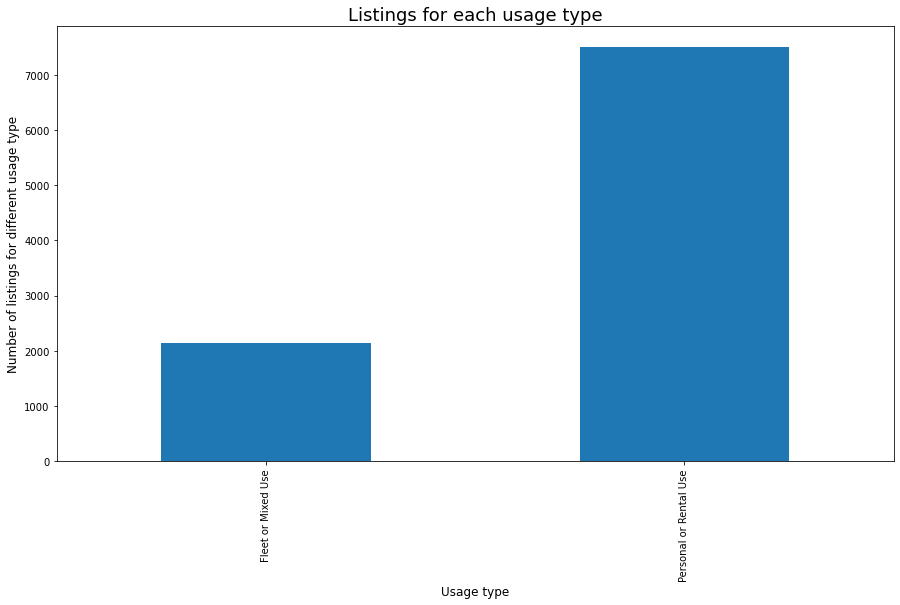

In [48]:
df.groupby(['usage_type'])['year'].count().plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different usage type', fontsize=12)
plt.xlabel('Usage type', fontsize=12)
plt.title('Listings for each usage type', fontsize=18)
plt.show()

In [49]:

len(df[df.usage_type=='Personal or Rental Use'])/len(df)

0.777121541809139

In [50]:
df.groupby('usage_type')['mileage'].mean()

usage_type
Fleet or Mixed Use        80584.538819
Personal or Rental Use    72773.771600
Name: mileage, dtype: float64

About 78% of the listed cars are for personal or rental use. Usually personal and leased car will have a lower mileage compared with fleet cars.

The above results show that the average mileage for personal or rental cars is about 69.5k miles compared with 77.5k miles for fleet or mixed use.

Fleet or Mixed Use: Fleet use is for companies such as Car rental company, police depearment, taxicab company, public utility companies.

Personal or Rental Use: Leased car or personal car.

# 1.8 Exterior color(select top 20 colors)

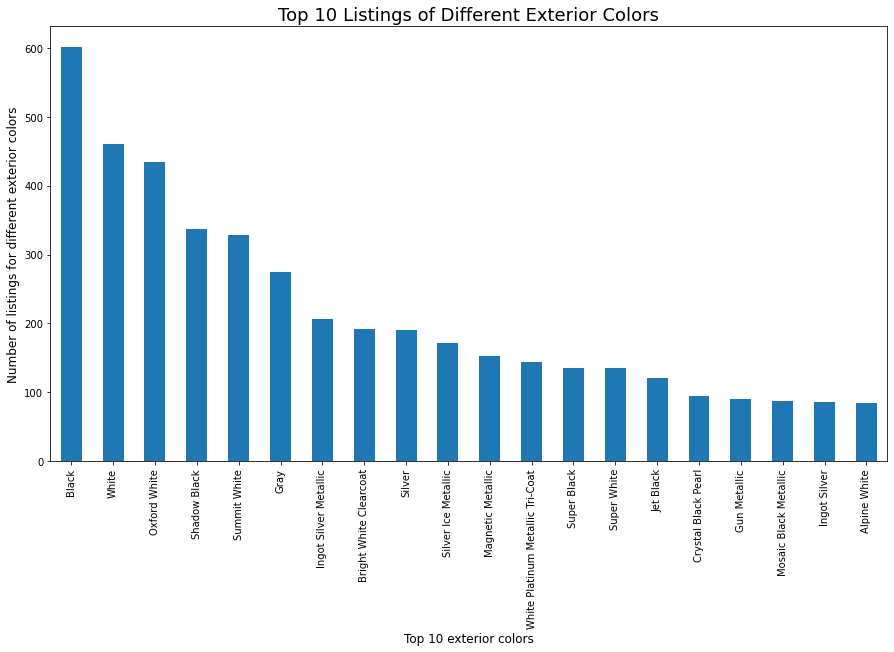

In [52]:
df.groupby(['exterior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different exterior colors', fontsize=12)
plt.xlabel('Top 10 exterior colors', fontsize=12)
plt.title('Top 10 Listings of Different Exterior Colors', fontsize=18)
plt.show()

From the above charts, the top three colors are Black, White and Oxford White. However, due to the different description of the similar colors, such as White and Oxford White, which we can combine as the same White color, we may need to combine some similar colors. Due to the time constraint, I will not spend time here.

# 1.9 Interior color(select top 20 colors)

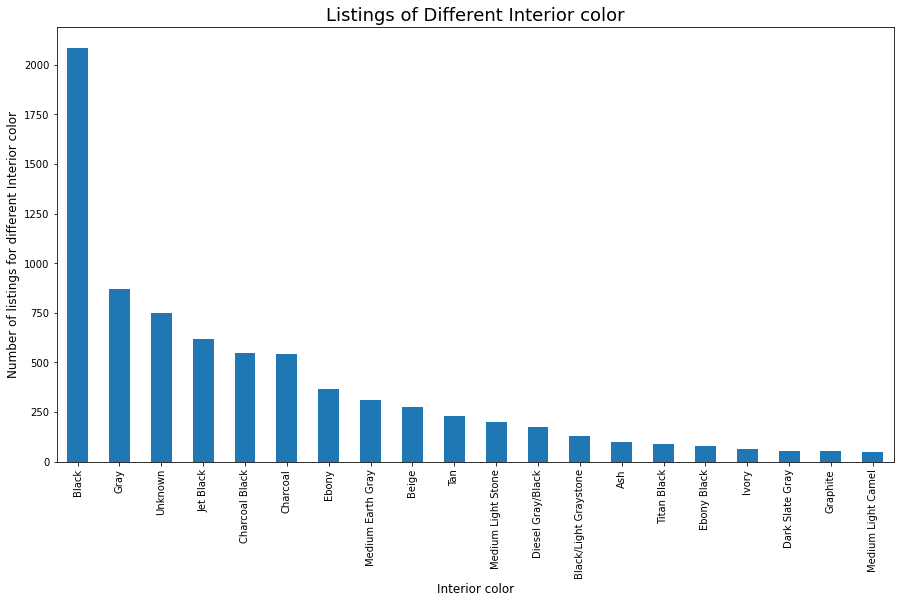

In [53]:
df.groupby(['interior_color'])['year'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different Interior color', fontsize=12)
plt.xlabel('Interior color', fontsize=12)
plt.title('Listings of Different Interior color', fontsize=18)
plt.show()

Except the unknown interior color, the top three colors are Black, Gray and Jet Black. It seems, different Black colors and Gray are the most popular colors for used car interior.

# 1.10 MPG for both city and highway

# mpg_city

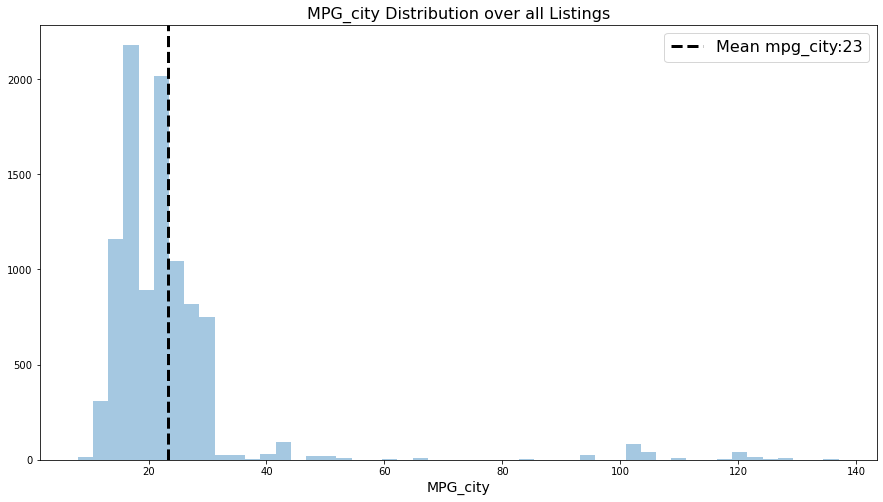

In [56]:
# look at mpg_city overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_city,kde=False)
plt.xlabel('MPG_city',fontsize=14)
plt.axvline(df.mpg_city.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_city:'+'{0:.0f}'.format(np.mean(df.mpg_city)))
plt.title('MPG_city Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [57]:
df.groupby('fuel_type')['mpg_city'].mean()

fuel_type
CNG          27.000000
Diesel       22.512821
Electric    117.534653
Gas          20.699020
Hybrid       41.482609
Hydrogen     66.000000
Plug-In     101.134328
Name: mpg_city, dtype: float64

The average mpg is about 23. The city mpg for the used cars are pretty normally between 10 to 30, which is very normal mpg values for most of the gasoline and diesel cars. However, there are some outliers which have either around 40 mpg or much higher mpg around 100 and 120.

From the above groupby analysis, we can see that the reason for the very high mpg could the high mpg for alternative fuel vehicles such as electric, hybrid, hydrogen, plug-in cars. Since these vehicles either have a very fuel efficient engine and energy recovery system onboard, or do not use gasoline for fuel (they use electric or hydrogen for fuel), these vehicles will have very high mpg when converting electric or hydrogen to gasoline equivalent.

# mpg_hwy

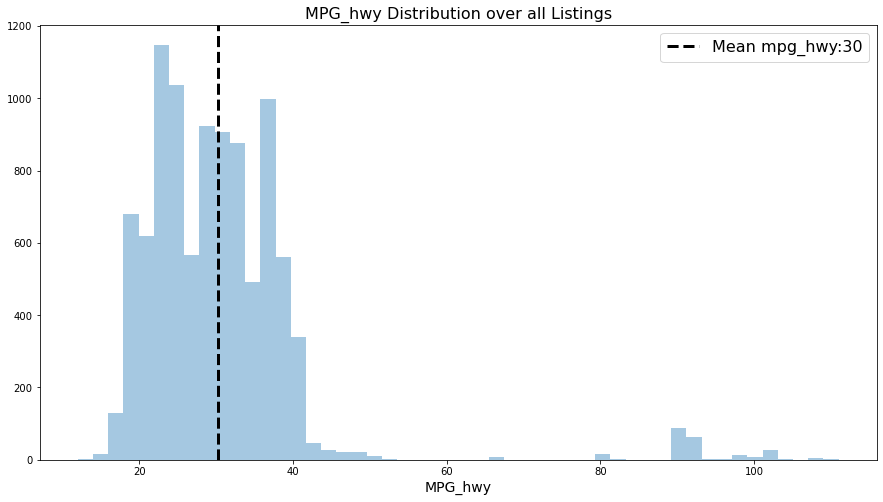

In [58]:
# look at mpg_hwy overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.mpg_hwy,kde=False)
plt.xlabel('MPG_hwy',fontsize=14)
plt.axvline(df.mpg_hwy.mean(),lw=3,ls='dashed',
            color='black',label='Mean mpg_hwy:'+'{0:.0f}'.format(np.mean(df.mpg_hwy)))
plt.title('MPG_hwy Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [59]:
df.groupby('fuel_type')['mpg_city'].mean()

fuel_type
CNG          27.000000
Diesel       22.512821
Electric    117.534653
Gas          20.699020
Hybrid       41.482609
Hydrogen     66.000000
Plug-In     101.134328
Name: mpg_city, dtype: float64

The average mpg for highway is 30, higher than for city roads which is reasonable and easy to explain. The reason is that engine is more efficient when it is running on fast speed and continuous driving on highways, while on city roads, cars will run on a lower speed and sometimes stop and go, which will reduce the mpg significantly.

The reason for mpg_city outliers above also applies here for mpg_hwy outliers.

# 1.11 Transmission, Drive_type for Listings

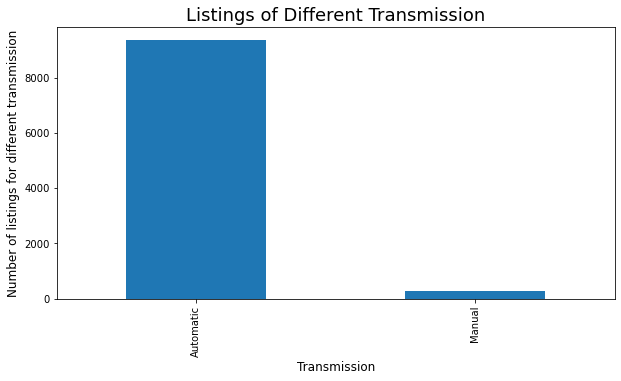

In [63]:
df.groupby(['transmission'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of listings for different transmission', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.title('Listings of Different Transmission', fontsize=18)
plt.show()

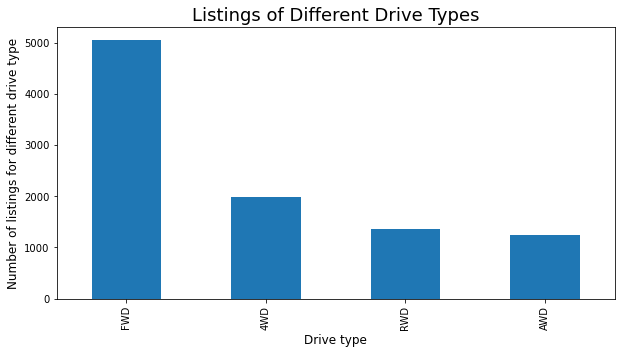

In [64]:
df.groupby(['drive_type'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of listings for different drive type', fontsize=12)
plt.xlabel('Drive type', fontsize=12)
plt.title('Listings of Different Drive Types', fontsize=18)
plt.show()

Most of the used cars are automatic and FWD from the above visualization.

# 1.12 Listings for either Certified Pre-owned or not

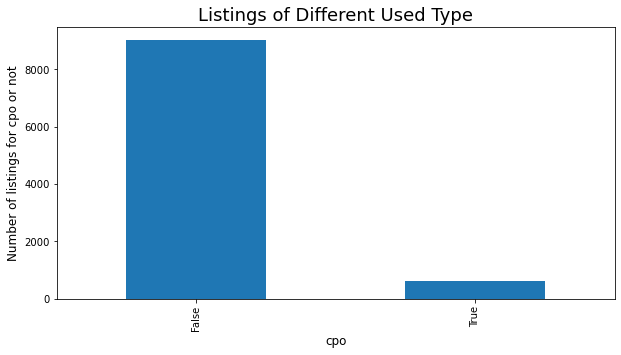

In [65]:
df.groupby(['cpo'])['year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of listings for cpo or not', fontsize=12)
plt.xlabel('cpo', fontsize=12)
plt.title('Listings of Different Used Type', fontsize=18)
plt.show()

In [66]:
len(df[df.cpo==True])/len(df)

0.06382758263392395

Certified preowned used cars only account for about 6.7% of total online used car listings.

# 1.13 Price distribution

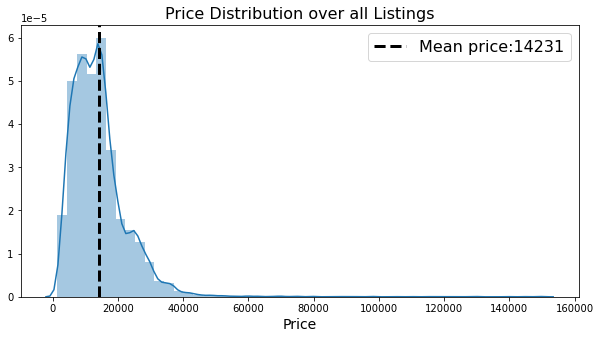

In [68]:

# look at miles overall distribution
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('Price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [69]:
df['price'].mean(), df['price'].median()

(14231.238006424204, 12978.0)

The average price is about $14,467 and the median price of used cars is $12,999.

The price distribution is more like a long-tail distribution and have right-skewness, which is very normal in price/value/cost distribution. We usually take a log transformation to convert to a normal distribution when we want to predict Price as a response variable.

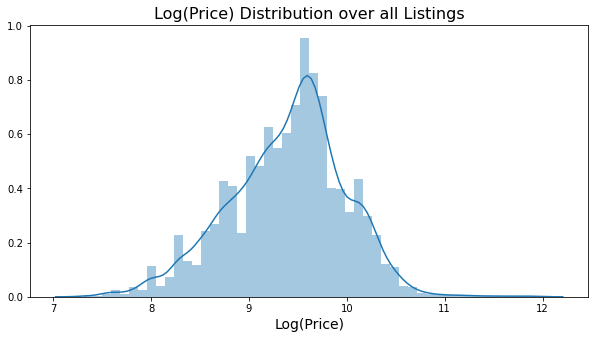

In [71]:
# log transformation for price. 
# After the transformation, the distribution is more like a normal distribution
plt.figure(figsize=(10,5))
log_price = np.log(df.price)
sns.distplot(log_price,kde=True)
plt.xlabel('Log(Price)',fontsize=14)
plt.title('Log(Price) Distribution over all Listings',fontsize=16)
plt.show()

# 1.14 Mileage distribution

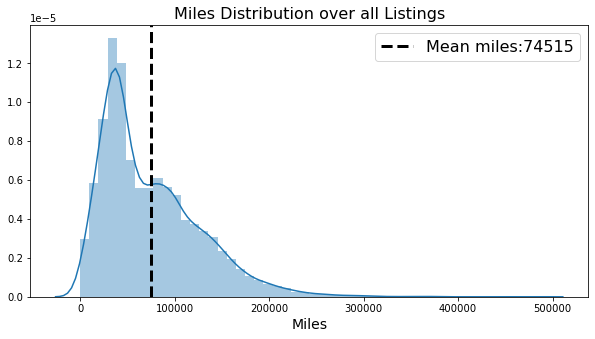

In [73]:
# look at miles overall distribution
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.distplot(df.mileage,kde=True)
plt.xlabel('Miles',fontsize=14)
plt.axvline(df.mileage.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.mileage)))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

The mean mileage is about 71k miles while the median mileage is much lower, which is only about 55k. The reason for this is the extremely high mileage outliers in the distribution, which also resulted in the long-tail distribution.

Log transformation for miles

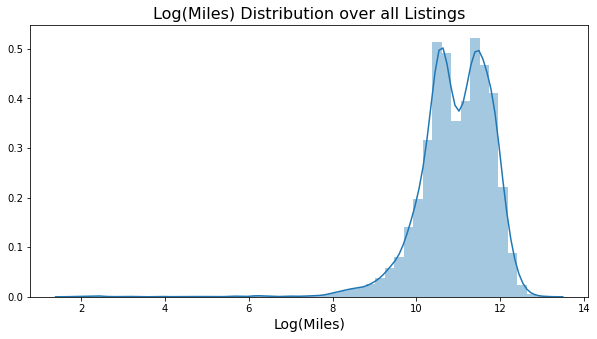

In [75]:
# It's not a normal distribution(a little bit right-skewed), try log transformation
fig = plt.figure(figsize=(10,5))
log_mile = np.log(df.mileage)
sns.distplot(log_mile,kde=True)
plt.xlabel('Log(Miles)',fontsize=14)
plt.title('Log(Miles) Distribution over all Listings',fontsize=16)
plt.show()
# But the log one is also not that good.. I will keep the original distribution

The log transformation for an independent variable is not necessary and also, the log transformation above is not ideal as well.

# 2. How price is related to other variables

### We want to know what variables are related to the resell price such as the model year, make, mpg, mileage, etc

In [76]:
df.columns

Index(['year', 'make', 'model', 'sub_model', 'city', 'state', 'mileage',
       'price', 'exterior_color', 'interior_color', 'mpg_city', 'mpg_hwy',
       'engine', 'transmission', 'drive_type', 'fuel_type', 'popular_feature',
       'cpo', 'num_accident', 'usage_type', 'title', 'num_owner'],
      dtype='object')

# 2.1 How the model year affect the price

### We want to know how the model is affected by model year in general

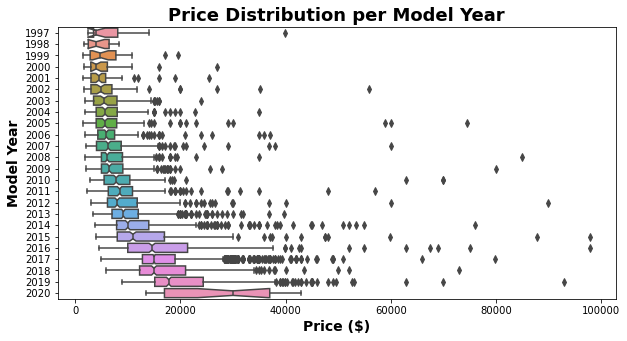

In [77]:
# look at price by year boxplot
# In order to better visualize the impact, I will limit the price up to 100,000
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.boxplot(x='price',y='year',data=df[df.price <= 100000],
            order=sorted(df.year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.show()

The above plots show that as the model year increase, the mean price is increasing and the range is also expanding. Specially for model year 2020, the price range is very large due to limited number of listings of mode year 2020.

## 2.2 How does the automaker impact price?

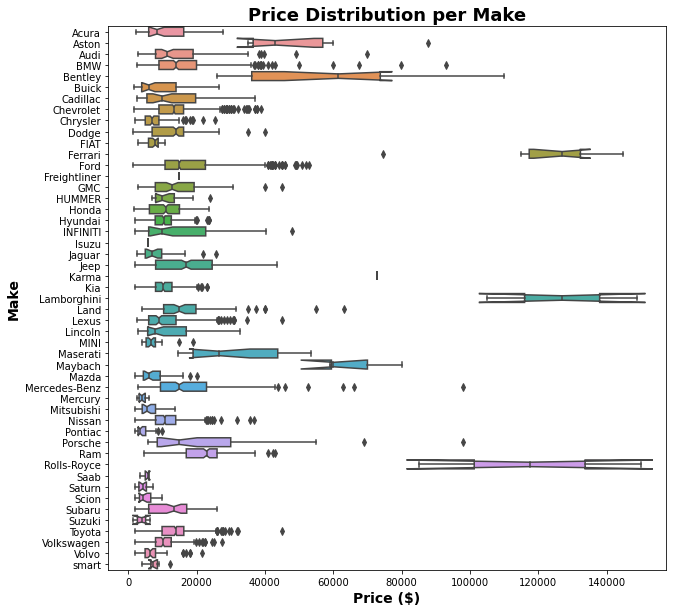

In [78]:

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.boxplot(x='price',y='make',data=df,
            order=sorted(df.make.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Make',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

The brands of used cars have a large impact on resell price. Some luxury brands such as Aston, Bentley, Ferrari, Rolls-Royce, have extreme high prices compared to other brands.

Brands/Make will make a great impact on predicting resell price especially when predicing these large extreme outliers. However, lots of algorithms can't deal with outliers well enough. Tree-based ensemble models are robust to outliers and models such as xgboost will be considered when predicting the resell price.

## 2.3 Will certified pre-owned cars have a higher price?

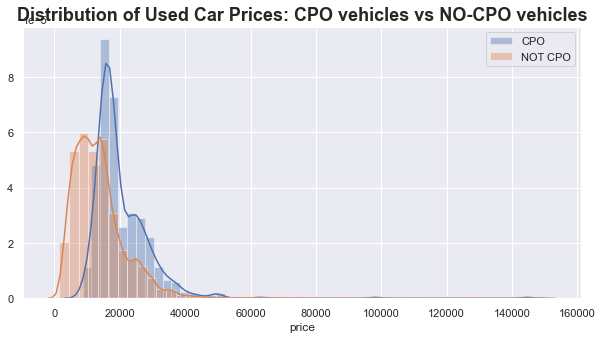

In [79]:
sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(df.price[df['cpo']==True],hist_kws={"label":'CPO'})
sns.distplot(df.price[df['cpo']==False],hist_kws={"label":'NOT CPO'})
plt.title('Distribution of Used Car Prices: CPO vehicles vs NO-CPO vehicles',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

In [80]:
## conduct a KS test to see if these two distributions are identical
from scipy import stats
price_cpo = df[df.cpo==True].price.values
price_non_cpo = df[df.cpo==False].price.values
stats.ks_2samp(price_cpo, price_non_cpo)

KstestResult(statistic=0.4686554452741503, pvalue=4.3298697960381105e-15)

The distributions between cpo and non-cpo are significantly different from observing the above graph and we can see that cpo vehicles have overall higher prices than non-cpo vehicles.

By conducting a KS test, we can also notice that the pvalue is extremely small so that we will confidently reject the null hypothesis that the two distributions are identical.

Therefore, whether this car is certified pre-owned matters in predicting resell prices

## 2.4 Will the title of vehicles impact the resale price?

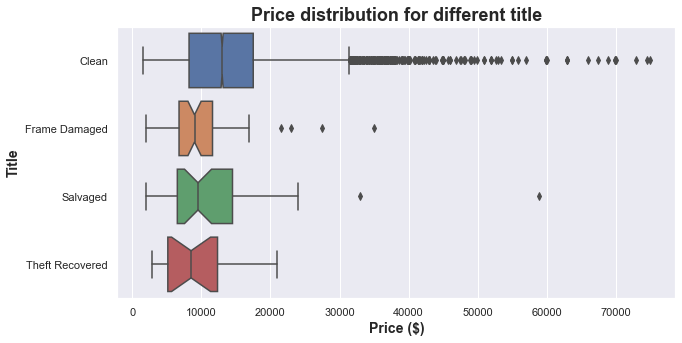

In [81]:

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
# In order to better visualize the impact, I will restrict the price under 75000
sns.boxplot(x='price',y='title',data=df[df.price <= 75000],
            order=sorted(df.title.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Title',fontsize=14,fontweight="bold")
plt.title('Price distribution for different title',fontsize=18,fontweight="bold")
plt.show()

The title variable definitely matters to some extent in determining the resell price. Vehicles without clean titles, such as frame-damaged cars, salvaged cars and theft-recovered cars, normally have less reliable safety performane, thus will be listed as a lower price compared with clean-title vehicles.

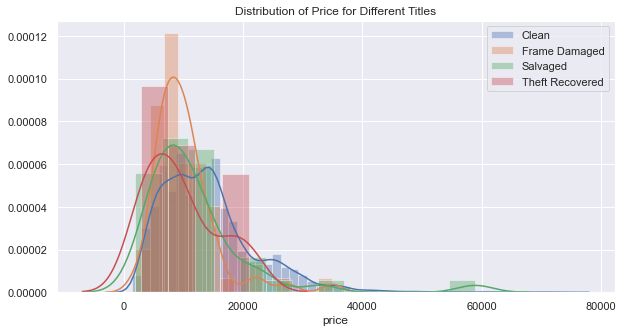

In [82]:
## In order to better visualize, I exclude the cars whose prices are over 75000
## Also get rid of Lemon car since there is only one data point
sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(df.price[(df['title']== 'Clean')&(df.price<75000)],hist_kws={"label":'Clean'})
sns.distplot(df.price[(df['title']== 'Frame Damaged')&(df.price<75000)],hist_kws={"label":'Frame Damaged'})
sns.distplot(df.price[(df['title']== 'Salvaged')&(df.price<75000)],hist_kws={"label":'Salvaged'})
sns.distplot(df.price[(df['title']== 'Theft Recovered')&(df.price<75000)],hist_kws={"label":'Theft Recovered'})

plt.title('Distribution of Price for Different Titles')
plt.legend()
plt.show()

The density plot above also shows that the clean title vehicles have relatively higher prices compared with other three types. However, the difference does not seem to be large enough.

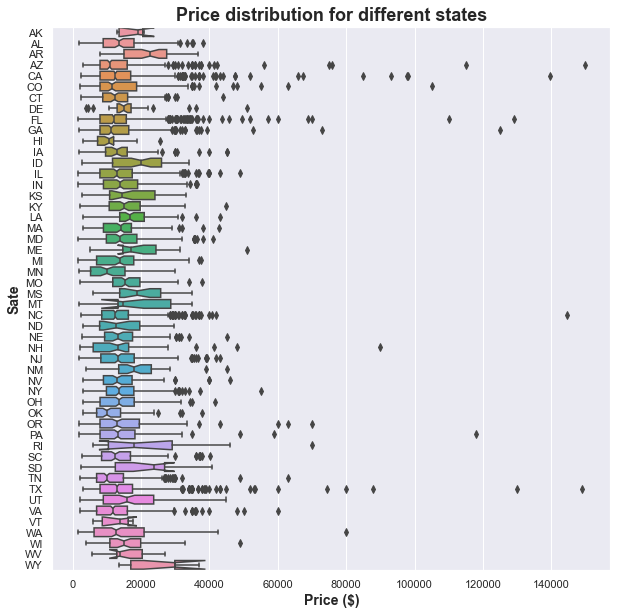

In [83]:

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.boxplot(x='price',y='state',data=df,
            order=sorted(df.state.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Sate',fontsize=14,fontweight="bold")
plt.title('Price distribution for different states',fontsize=18,fontweight="bold")
plt.show()

The differences of distributions of used car prices in different states seems not significant. However, it's hard to detect in this plots.

People always say that the prices of used car in CA is higher than out of CA. Sometimes, people are also curious if the used car prices in CA and TX are different.

Therefore, I decided to run two comparisons between CA and non-CA, between CA and TX.

However, due to time constraints, I don't have time to do matching to do the comparison. Instead, I will use visualization tools such as histogram and density plot to see if there are significant differences.

## 2.5.1 Do used cars in CA and non-CA have different prices?

In [84]:
# Add the treat variable to indicate whether the data is in CA or not.
# Assuming in CA as the treatment group, not in CA as the control group.
df['treat']=df.state.apply(lambda x: 'CA' if x == 'CA' else 'non-CA')
df['cpo'] = df['cpo'].map({True:1, False:0})
df.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner,treat
0,2017,Ford,['Fusion'],SE FWD,Stanton,CA,56448,10899,Magnetic,Gray,...,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",0,0,Fleet or Mixed Use,Clean,1,CA
1,2017,BMW,"['3', 'Series']",330i xDrive Sedan,Freeport,NY,31028,15928,Alpine White,Venetian Beige/Black,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,1,non-CA
2,2019,Dodge,"['Grand', 'Caravan']",SXT,San Francisco,CA,20386,18697,Black Onyx Crystal Pearlcoat,Black/Light Graystone,...,Automatic,FWD,Gas,"['Power Trunk/Liftgate', 'Remote Engine Start'...",0,0,Personal or Rental Use,Clean,1,CA
3,2017,Ford,['Fusion'],SE FWD,Denver,NC,99515,8799,Shadow Black,Black,...,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",0,1,Fleet or Mixed Use,Clean,2,non-CA
4,2018,Ford,['F-150'],XLT SuperCrew 5.5' Box 4WD,Boulder,CO,43503,26800,Oxford White,Dark Earth Gray,...,Automatic,4WD,Gas,[],0,0,Personal or Rental Use,Clean,1,non-CA


In [85]:
# The simple comparison of average price is not significantly different, 
# but we would like to use graph to check if this is true
print(df[df.state=='CA']['price'].mean(),df[df.state=='CA']['price'].median())
print(df[df.state!='CA']['price'].mean(),df[df.state!='CA']['price'].median())

14050.289099526066 12494.0
14253.446137738483 12990.0


The median and mean prices for CA and non-CA are pretty similar.

Let's look at the histogram below.

treat
CA        AxesSubplot(0.125,0.125;0.775x0.755)
non-CA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

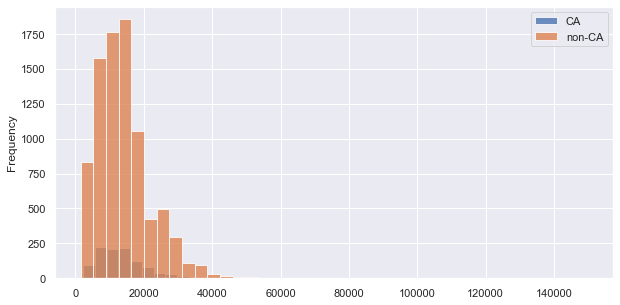

In [88]:

df.groupby('treat')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True, figsize = (10,5))

Histogram looks also very similar. But due to the different number of car listings inside and outside CA, this comparison may not be that obvious.

So let's see the density plots

treat
CA        AxesSubplot(0.125,0.125;0.775x0.755)
non-CA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

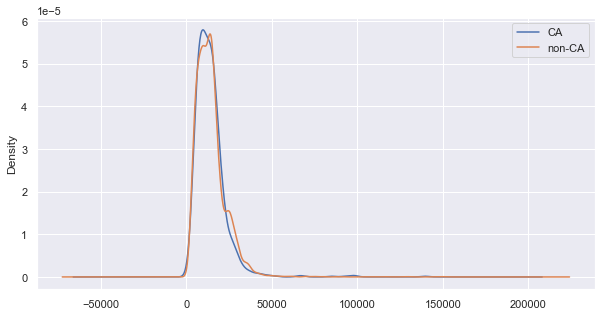

In [89]:

df.groupby('treat')['price'].plot(kind='kde', legend=True, figsize = (10,5))

The price density plots of CA and non-CA are very similar. If we assume all other variable distributions (mean and sd) are similar between CA and non-CA, then we are confident to say that the vehicle prices between CA and non-CA are very close. So people's common sense is probably wrong.

However, if we want to conduct a better comparison, the matching algorithm such as greedy matching utilizing nearest neighbors can be applied to control all other confounding variables. Then we can have a better comparison to see if the car in CA has a different price from the similar car out of CA.

# 2.5.1 Do cars in TX and CA have different prices?

In [90]:
test = df[df.state=='TX']
control = df[df.state=='CA']
total = pd.concat([test, control])
total.head()

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner,treat
35,2014,Mercedes-Benz,['CL'],CL 550 4MATIC,Addison,TX,44370,33988,Diamond White Metallic,Black,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,2,non-CA
48,2008,BMW,['X3'],3.0si AWD,Spring,TX,103644,6000,Silver Gray Metallic,Gray,...,Automatic,AWD,Gas,[],0,0,Personal or Rental Use,Clean,5,non-CA
55,2017,Chevrolet,['Cruze'],LT with 1SD Sedan Automatic,Houston,TX,84927,9114,Tungsten Metallic,Jet Black,...,Automatic,FWD,Gas,"['Front Heated Seats', 'Cruise Control', 'Blue...",0,0,Fleet or Mixed Use,Clean,2,non-CA
75,2003,Lexus,['LS'],LS 430,Spring,TX,143106,5500,Crystal White,Ecru,...,Automatic,RWD,Gas,[],0,0,Personal or Rental Use,Clean,3,non-CA
87,2013,Ford,['Explorer'],XLT FWD,Corpus Christi,TX,150963,9648,Oxford White,Charcoal Black,...,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",0,0,Personal or Rental Use,Clean,2,non-CA


state
CA    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

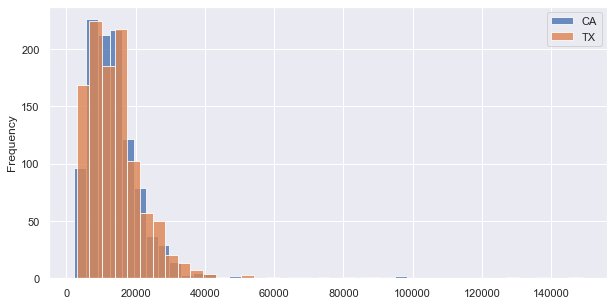

In [91]:

total.groupby('state')['price'].plot(kind='hist', bins=40, alpha=0.8, legend=True, figsize=(10,5))

state
CA    AxesSubplot(0.125,0.125;0.775x0.755)
TX    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

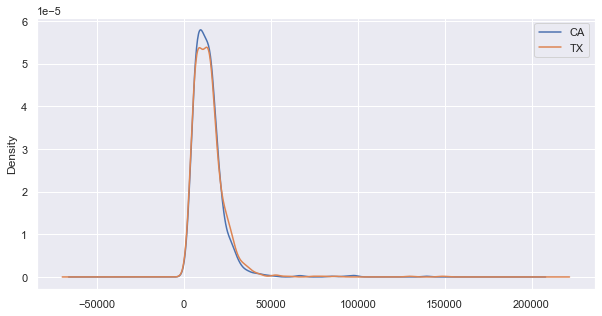

In [92]:
total.groupby('state')['price'].plot(kind='kde', legend=True, figsize = (10,5))

From the above two plots, I didn't see any big differences of used car pricing between CA and TX.

# 2.6 How will the mileage impact resale price?

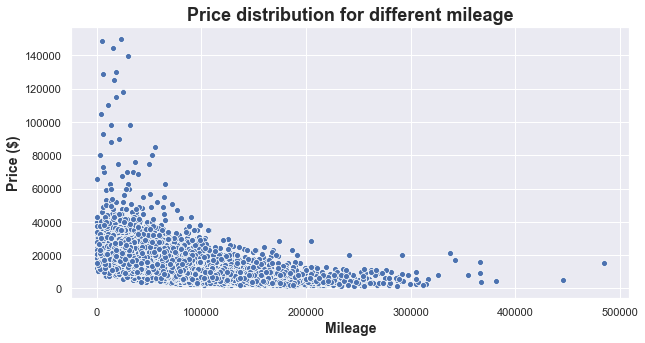

In [94]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.scatterplot(x='mileage',y='price',data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Price distribution for different mileage',fontsize=18,fontweight="bold")
plt.show()

From the above plot, we can conclude that there is a decreasing trend of price when the mileage increases.

# 2.7 How will the fuel_type impact resale price? Is the resale price for alternative vehicles higher?

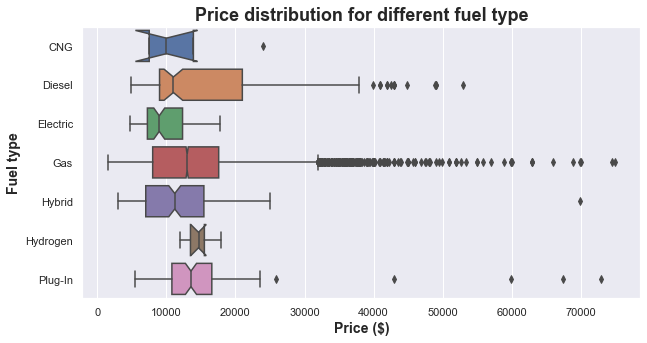

In [95]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
# in order to better visualize, I will limit the price under 75000
sns.boxplot(x='price',y='fuel_type',data=df[df.price <= 75000],
            order=sorted(df.fuel_type.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Fuel type',fontsize=14,fontweight="bold")
plt.title('Price distribution for different fuel type',fontsize=18,fontweight="bold")
plt.show()

fuel_type
CNG         AxesSubplot(0.125,0.125;0.775x0.755)
Diesel      AxesSubplot(0.125,0.125;0.775x0.755)
Electric    AxesSubplot(0.125,0.125;0.775x0.755)
Gas         AxesSubplot(0.125,0.125;0.775x0.755)
Hybrid      AxesSubplot(0.125,0.125;0.775x0.755)
Hydrogen    AxesSubplot(0.125,0.125;0.775x0.755)
Plug-In     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

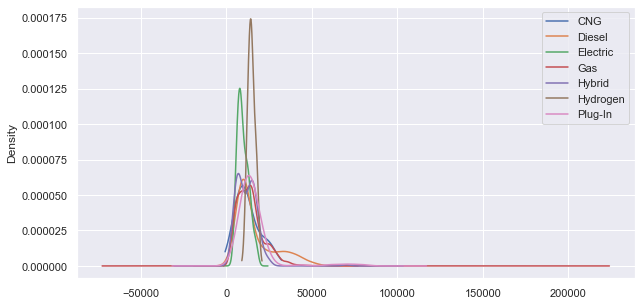

In [96]:
df.groupby('fuel_type')['price'].plot(kind='kde', legend=True, figsize = (10,5))

From the above two plots, I didn't observe significant differences of prices among diferent fuel type technologies.

# 2.8 How will the mpg impact resale price?

Since mpg is highly related to fuel type, so I will use different colors for different fuel type

# City mpg first

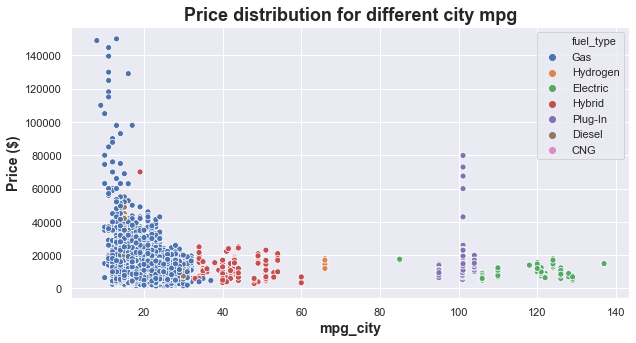

In [97]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.scatterplot(x='mpg_city',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_city',fontsize=14,fontweight="bold")
plt.title('Price distribution for different city mpg',fontsize=18,fontweight="bold")
plt.show()

# Highway mpg

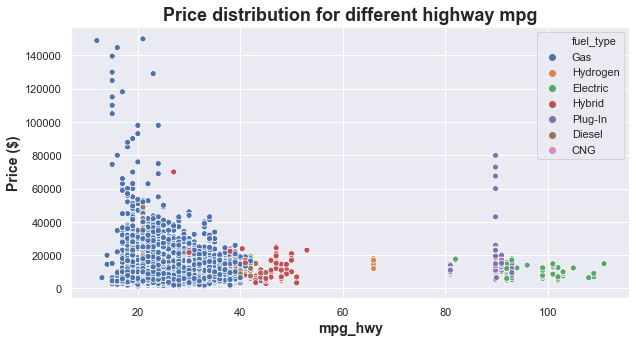

In [99]:
# fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.scatterplot(x='mpg_hwy',y='price',hue = 'fuel_type', data=df)
plt.ylabel('Price ($)',fontsize=14,fontweight="bold")
plt.xlabel('mpg_hwy',fontsize=14,fontweight="bold")
plt.title('Price distribution for different highway mpg',fontsize=18,fontweight="bold")
plt.show()

From the above two graphs between price and mpg (hwy and city), I noticed that most of the high-priced used cars are gasoline cars. This is easy to intepret since most of the luxury cars are gasoline type. Also for the gasoline cars, a lower mpg normally means a higher price from the plot since luxury cars are not that fuel efficient.

Another findings is that for the alternative fuel vehicles such as Plug-in, electric, hydrogen, even though their mpg is very high, their prices are relatively stable under 30k except for some plug-in cars. The reason is that the alternative fuel vehicles normally do not belong to luxury class, such as Volt, Bolt and Nissan Leaf. But for some plug-in cars, there are some mid-to-luxury cars such as Porsche plug-ins or Tesla.

# 3. Popular feature analysis

In order to understand what kind of vehicle features are popular in the used car listings, I decided to analyze the popular feature columns based on their frequencies.

In [100]:
df.popular_feature.head(10)

0     ['Cruise Control', 'Bluetooth', 'Backup Camera']
1                                                   []
2    ['Power Trunk/Liftgate', 'Remote Engine Start'...
3     ['Cruise Control', 'Bluetooth', 'Backup Camera']
4                                                   []
5    ['Front Heated Seats', 'Cruise Control', 'Back...
6                                                   []
7                                                   []
8    ['Power Trunk/Liftgate', 'Remote Engine Start'...
9     ['Cruise Control', 'Bluetooth', 'Backup Camera']
Name: popular_feature, dtype: object

In [101]:
## get the index of empty features data rows from the dataset
empty_index = []
for i in range(len(df)):
    if len(df.popular_feature[i]) == 2:
        empty_index.append(i)
len(empty_index)

3759

In [102]:
## exact rows with at least one feature inside.
new_df = df.drop(empty_index)

In [103]:
new_df['feature_set'] = new_df.popular_feature.apply(lambda x: x[1:-1].split(', '))
len(new_df)

5892

In [104]:

# Create a bag of features in order to count the frequencies.
new_df['features'] = None
feature_bag = []
for i in new_df.index:
    new_df['features'][i] = [feature[1:-1] for feature in new_df.feature_set[i]]
    for feature in new_df.feature_set[i]:
        feature_bag.append(feature[1:-1])
print(new_df.features.head())
print(feature_bag[:10])

0           [Cruise Control, Bluetooth, Backup Camera]
2    [Power Trunk/Liftgate, Remote Engine Start, Ba...
3           [Cruise Control, Bluetooth, Backup Camera]
5    [Front Heated Seats, Cruise Control, Backup Ca...
8    [Power Trunk/Liftgate, Remote Engine Start, Bl...
Name: features, dtype: object
['Cruise Control', 'Bluetooth', 'Backup Camera', 'Power Trunk/Liftgate', 'Remote Engine Start', 'Backup Camera', 'Front Heated Seats', 'Cruise Control', 'Bluetooth', 'Cruise Control']


In [105]:

# Make a counter object to count the frequencies of each popular features
count = Counter(feature_bag)
count

Counter({'Cruise Control': 5834,
         'Bluetooth': 5175,
         'Backup Camera': 4256,
         'Power Trunk/Liftgate': 865,
         'Remote Engine Start': 2029,
         'Front Heated Seats': 2306,
         'Blind Spot System': 1142,
         'Lane Keep Assist': 574,
         'Moonroof': 1159,
         'Navigation': 1268,
         'Front Cooled Seats': 392})

In [106]:

print('The top 3 features are Cruise Control, Bluetooth and Backup Camera, \
and there are {:.0%} with Cruise Control, {:.0%} with Bluetooth and {:.0%} with \
Backup Camera'.format(5864/len(new_df), 5214/len(new_df), 4285/len(new_df)))

The top 3 features are Cruise Control, Bluetooth and Backup Camera, and there are 100% with Cruise Control, 88% with Bluetooth and 73% with Backup Camera


Text(0, 0.5, 'Counts')

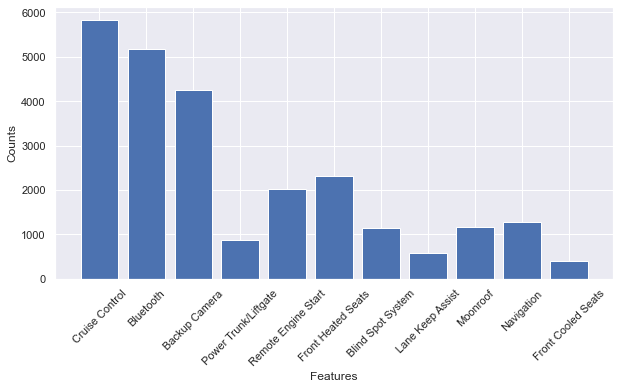

In [108]:

# Counts of features in Listings
plt.figure(figsize=(10,5))
plt.bar(count.keys(), count.values())
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Counts')

In [111]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel
import graphviz

In [112]:
#! pip install graphviz

In [ ]:
df = pd.read_csv('../data/usedCarListingCleaned.csv')
del df['Unnamed: 0']
df=df[df.title != 'Lemon'] # get rid of one record of Lemon car 
df['year'] = df['year'].astype(object)
print(df.shape)
df.head()

In [ ]:
## Check levels for different categorical variables

In [113]:

cat_cols = ['year', 'make', 'model', 'sub_model', 'city', 'state', 'exterior_color', 'interior_color',
           'engine', 'transmission', 'drive_type', 'fuel_type', 'cpo', 'usage_type', 'title']
num_cols = ['mileage', 'mpg_city', 'mpg_hwy', 'num_accident', 'num_owner']
res_y = 'price'

In [114]:
for column in cat_cols:
    print('The number of unique level for {} is {}'.format(column, len(df[column].unique())) )

The number of unique level for year is 24
The number of unique level for make is 49
The number of unique level for model is 486
The number of unique level for sub_model is 1859
The number of unique level for city is 1557
The number of unique level for state is 50
The number of unique level for exterior_color is 1049
The number of unique level for interior_color is 569
The number of unique level for engine is 179
The number of unique level for transmission is 2
The number of unique level for drive_type is 4
The number of unique level for fuel_type is 7
The number of unique level for cpo is 2
The number of unique level for usage_type is 2
The number of unique level for title is 4


#### Since we only have 9982 data records, and after the train-test-split, we may only have very limited data for training. Therefore, it's a good idea to drop catagorical variables that have too many levels.

Since from last notebook, we noticed that for state variable, it does not seem to impact the price since the price distribution is very similar when we compare CA and non-CA, CA and TX. Therefore, I will also drop state variable in order to reduce the number of columns after onehot encoding.

I will drop categorical variables including state, model, sub_model, city, exterior_color, interior_color, engine

In [116]:

left_cat_cols=['year', 'make',  'transmission', 'drive_type', 'fuel_type', 'cpo', 'usage_type', 'title']

# One hot encoding and Train test split

In [117]:
#The reason for doing onehot encoding before train test split is that: no matter how I do the split, there will always be level mismatch in train and test data, which will give different number of predictors in train and test datasets.
#To overcome this, I decided to do onehot encoding before the train test split.
#Do log transformation for price

In [118]:
final_cols = left_cat_cols + num_cols
y = np.log(df[res_y].values)

In [119]:
%%time
X = pd.get_dummies(df[final_cols], drop_first=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=10)
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(8685, 69) (966, 69) (8685,) (966,)
Wall time: 208 ms


# Standardization for numeric features

In [120]:
scaled_num_cols = ['scaled_'+col for col in num_cols]
num_scaler = StandardScaler().fit(X_tr[num_cols])

In [121]:
%%time
X_tr_num_scaled = pd.DataFrame(num_scaler.transform(X_tr[num_cols]), 
                                  index = X_tr.index, columns = scaled_num_cols)

Wall time: 9 ms


In [122]:

%%time
X_te_num_scaled = pd.DataFrame(num_scaler.transform(X_te[num_cols]), index = X_te.index, columns = scaled_num_cols)

Wall time: 7 ms


In [123]:

print(X_tr_num_scaled.shape, X_te_num_scaled.shape)

(8685, 5) (966, 5)


# Combine onehoted categorical columns and standardized numerical columns for both train and test data

In [124]:
X_tr_final = pd.concat([X_tr_num_scaled, X_tr.drop(num_cols, axis=1)], axis=1)
X_te_final = pd.concat([X_te_num_scaled, X_te.drop(num_cols, axis=1)], axis=1)
print(X_tr_final.shape, X_te_final.shape)

(8685, 69) (966, 69)


# Check the train test data in terms of distribution

I found that the distributions of response variable 'price' and one of the indicator variable 'mileage' in train and test data are very similar, which is good.

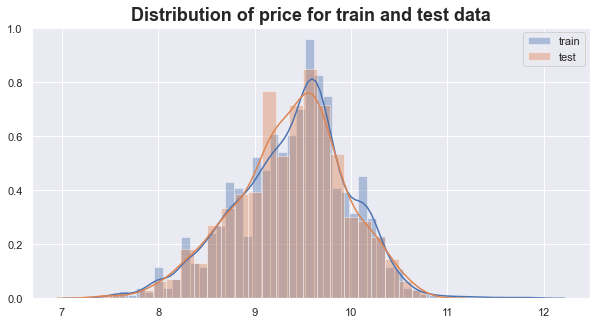

In [125]:
sns.set(rc={"figure.figsize": (10,5)})
sns.distplot(y_tr,hist_kws={"label":'train'})
sns.distplot(y_te,hist_kws={"label":'test'})
plt.title('Distribution of price for train and test data',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

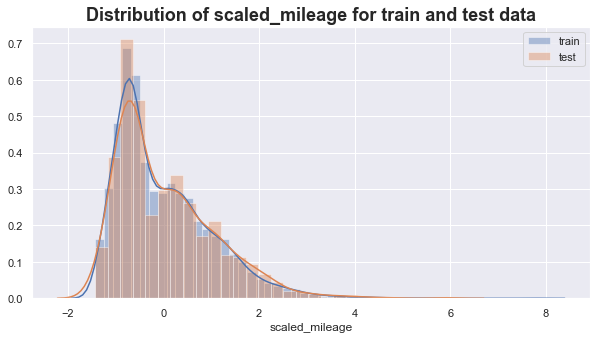

In [126]:
sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(X_tr_final.scaled_mileage,hist_kws={"label":'train'})
sns.distplot(X_te_final.scaled_mileage,hist_kws={"label":'test'})
plt.title('Distribution of scaled_mileage for train and test data',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

# xgboost model

In [127]:
# check the shape
X_tr_final.shape, y_tr.shape

((8685, 69), (8685,))

In [128]:
### train validataion split
X_tr, X_val, y_train, y_val = train_test_split(X_tr_final, y_tr, test_size=0.2, random_state=1024)
print('Training data dimensions are {} for X_tr, {} for y_train'.format(X_tr.shape, y_train.shape))
print('Validation data dimensions are {} for X_val, {} for y_val'.format(X_val.shape, y_val.shape))

Training data dimensions are (6948, 69) for X_tr, (6948,) for y_train
Validation data dimensions are (1737, 69) for X_val, (1737,) for y_val


In [129]:
## Create DMatrix for xgboost model
train_dmatrix = xgb.DMatrix(X_tr, label=y_train)
val_dmatrix = xgb.DMatrix(X_val, label=y_val)
eval_setting = [(train_dmatrix, 'train'), (val_dmatrix, 'eval')]

In [130]:

%%time
xgb_params = {'colsample_bytree': 0.4,
             'eta': 0.1,
             'gamma': 2,
             'max_depth': 4,
             'min_child_weight': 100,
             'objective': 'reg:linear',
             'seed': 1024,
             'subsample': 1,
             'eval_metric': 'rmse'
             }
model = xgb.train(params=xgb_params,
                 dtrain=train_dmatrix,
                 num_boost_round=500,
                 evals=eval_setting,
                 early_stopping_rounds=50,
                 verbose_eval=100
                 )
best_iteration = model.best_iteration
best_score = model.best_score
print('Model best score is {}, best iteration is {}'.format(best_score, best_iteration))

[19:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:8.02394	eval-rmse:8.03866
[100]	train-rmse:0.22139	eval-rmse:0.23562
[200]	train-rmse:0.21623	eval-rmse:0.22970
[295]	train-rmse:0.21542	eval-rmse:0.22902
Model best score is 0.229021, best iteration is 246
Wall time: 2.81 s


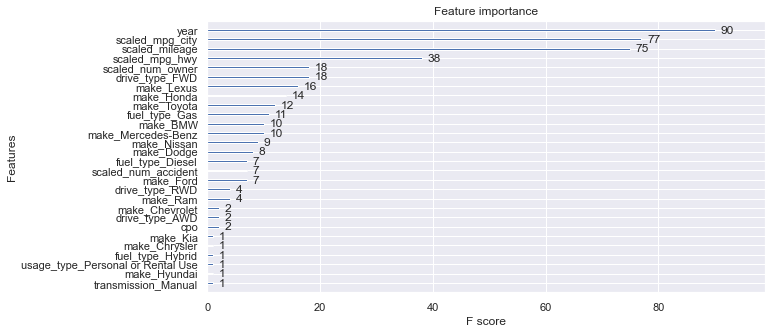

In [131]:
xgb.plot_importance(model)

The most important features include mileage, mpg (mpg_city, hwy) and number of previous owners, and model year.

From our previous EDA session, we also found taht mileage and mpg seem to matter when determining the resell price. And model year is also an important factor.

# Making prediction on test data

In [132]:
test_dmatrix=xgb.DMatrix(X_te_final)
y_pred = pd.Series(model.predict(test_dmatrix))
pred_price = y_pred.apply(np.exp).clip(lower=0.)

In [133]:
mae = np.mean(abs(pred_price-np.exp(y_te)))
print('The MAE for test data is about ${}'.format(mae))

The MAE for test data is about $2009.6750647503397


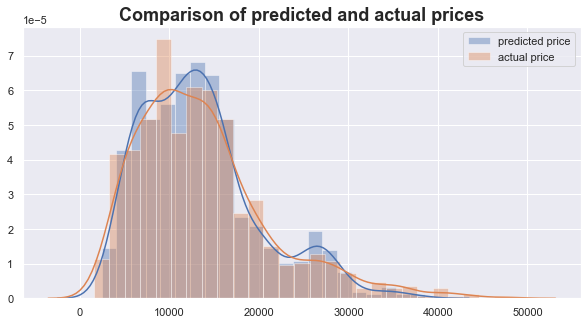

In [134]:

sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(pred_price,hist_kws={"label":'predicted price'})
sns.distplot(np.exp(y_te),hist_kws={"label":'actual price'})
plt.title('Comparison of predicted and actual prices',fontsize=18,fontweight="bold")
plt.legend()
plt.show()